# Project: Appointment Show Factors

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Version statement**: <br>
    This version is created to satisfy requirements on simplified coding various visuals. Compared with previous version, this version also enriches scope of analysis. <br>

> This project aims to identify factors that might impact patient's show rate in scheduled appointment. <br>
> In details, to answer 4 questions: <br>
    > 1. Is show rate different per neighborhood? Which neighborhood has highest show rate? Which has the lowest? <br>
    > 2. Is age an good predictor of patients' show in appointment? <br>
    > 3. For all the other categorical variables, within which group show rate differs a lot? <br>
    > 4. Is there any difference in show rate among workday and month?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# check current dir
import os
os.listdir()

['.ipynb_checkpoints',
 'Appointment Show Rate Factors v2.ipynb',
 'Appointment Show Rate Factors.html',
 'Appointment Show Rate Factors.ipynb',
 'investigate-a-dataset-template.ipynb',
 'noshowappointments-kagglev2-may-2016.csv',
 'Testing.ipynb']

In [3]:
# import dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# check data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [5]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no null values in this dataset.

In [6]:
# check if any duplicates
df.duplicated().sum()

0

No duplicated values.

In [7]:
# in the end, perform a descriptive analysis
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# number of 0 value in age
sum(df['Age']==0)

3539

In [9]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> **Conclusion:** <br>
> This dataset has no null or duplicated data, pretty clean. <br>
> In descriptive analysis, Age ranges from -1 to 115, also has 3539 zero value. It is unclear if it refers to new baby or null. <br>
> Handcap column is ordinal, but majority is 0. Later it could be translated to dummy variable as handicaped yes or no, which could have more meaning. <br>
> The other columns excpet for PatientId, AppointmentID, Age and Neighborhood seem to be all dummy variables. <br>

### Data Cleaning

In [10]:
# Gender column needs to be converted to dummy
male = pd.get_dummies(df['Gender'], drop_first = True)
male

,M
0,0
1,1
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


In [11]:
# create a new column in dataset called male (yes/no)
df['male'] = male
df['male'].head(5)

0    0
1    1
2    0
3    0
4    0
Name: male, dtype: uint8

In [12]:
# As indicated previously, handcap column is ordinal, will make it to handicap yes or no
df['Handicaped_dummy'] = df['Handcap'].apply(lambda x: 1 if x>=1 else 0)
df['Handicaped_dummy'].value_counts()

0    108286
1      2241
Name: Handicaped_dummy, dtype: int64

In [13]:
# There are a couple columns that are not used in this dataset, so they will be dropped
df.drop(['AppointmentID', 'Gender','ScheduledDay'], axis = 1, inplace = True)
df.head(5)

,PatientId,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,male,Handicaped_dummy
0,2.987250e+13,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,5.589978e+14,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,4.262962e+12,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,8.679512e+11,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,8.841186e+12,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0


In [14]:
# No show column to dummy
df['No-show'] = pd.get_dummies(df['No-show'])

> **Conclusion:** <br>
> Gender column is adjusted to dummy. <br>
> Handicaped dummy is created to show if handicaped. <br>
> Dropped unused columns.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 <br>
### Does weekday of appointment impact show rate? Show rate differs by month?

weekday
Friday       0.787739
Monday       0.793529
Saturday     0.769231
Thursday     0.806459
Tuesday      0.799064
Wednesday    0.803108
Name: No-show, dtype: float64

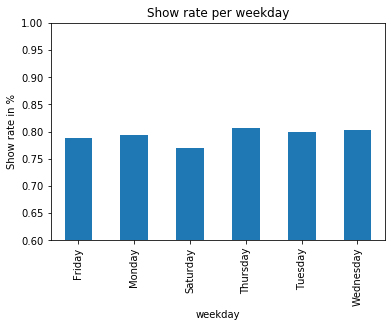

In [15]:
# extract weekday from appointment
df['weekday'] = pd.DatetimeIndex(df['AppointmentDay']).day_name()
# Calculation and visualization
df.groupby(['weekday'])['No-show'].mean().plot(kind='bar', title ='Show rate per weekday', ylabel ='Show rate in %')
plt.ylim(0.6,1)
df.groupby(['weekday'])['No-show'].mean()

month  male
April  0       0.801928
       1       0.808621
June   0       0.817221
       1       0.812042
May    0       0.789929
       1       0.796210
Name: No-show, dtype: float64

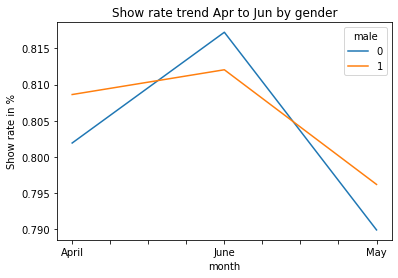

In [16]:
# extract month from appointment day
df['month'] = pd.DatetimeIndex(df['AppointmentDay']).month_name()
# compare show rate by month between male and female
df.groupby(['month','male'])['No-show'].mean().unstack().plot(kind='line', title ='Show rate trend Apr to Jun by gender', ylabel='Show rate in %')
df.groupby(['month','male'])['No-show'].mean()

> **Conclusion**: <br>
> Weekday causes difference in show rate, Saturday is the lowest (76%). <br>
> From Apr to Jun, May has the lowest show rate (79% male, 80% female), show rate for male is more stable.

### Research Question 2 <br>
### Is show rate different per neighborhood? Which neighborhood has highest show rate? Which has the lowest?

C:\Users\xjuan\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighboorhood distribution [number of show vs. number of no-show]')

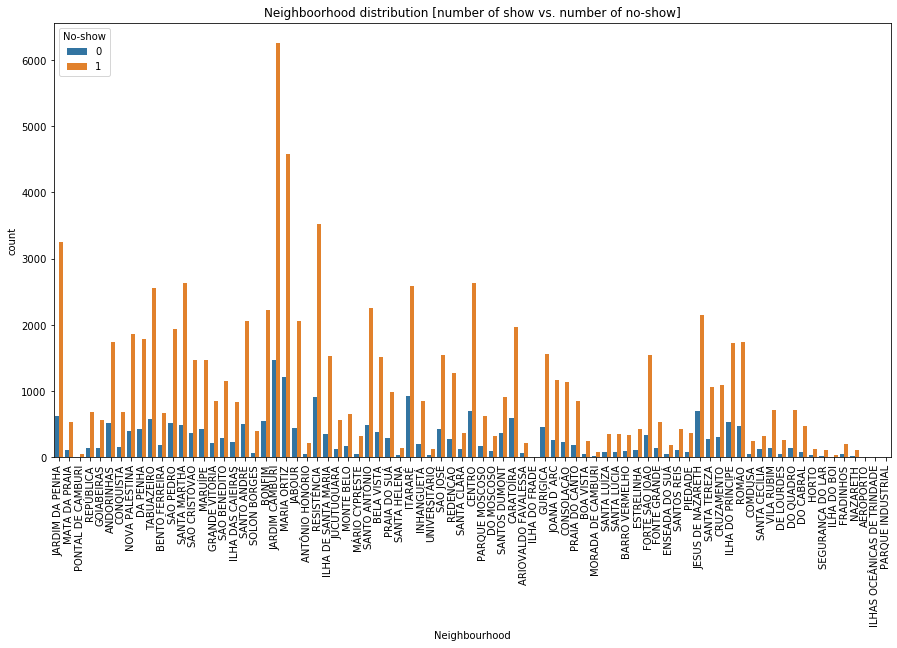

In [17]:
# check neighborhood distribution (show vs. no show)
plt.subplots(figsize = (15,8))
sns.countplot(df['Neighbourhood'], hue = df['No-show'])
plt.xticks(rotation = 90)
plt.title('Neighboorhood distribution [number of show vs. number of no-show]')

In [18]:
# function to plot neighborhood and age
def bar_comparison(col):
    # calculate show rate for passed column
    col_show = df.groupby([col])['No-show'].mean()
    # visualization
    x = np.arange(len(col_show))
    y = col_show.values
    labels = col_show.index
    
    plt.subplots(figsize=(18,10))
    plt.bar(x, y)
    plt.xticks(x, labels, rotation = 90)
    plt.ylim(0.6, 1)
    plt.title('Show rate per {}'.format(col))
    plt.xlabel('{}'.format(col))
    plt.ylabel('Show rate in %')
    
    dscp = pd.DataFrame(col_show.describe().loc[['mean','25%','50%','75%']])
    return dscp

,No-show
mean,0.794573
25%,0.782546
50%,0.802412
75%,0.820093


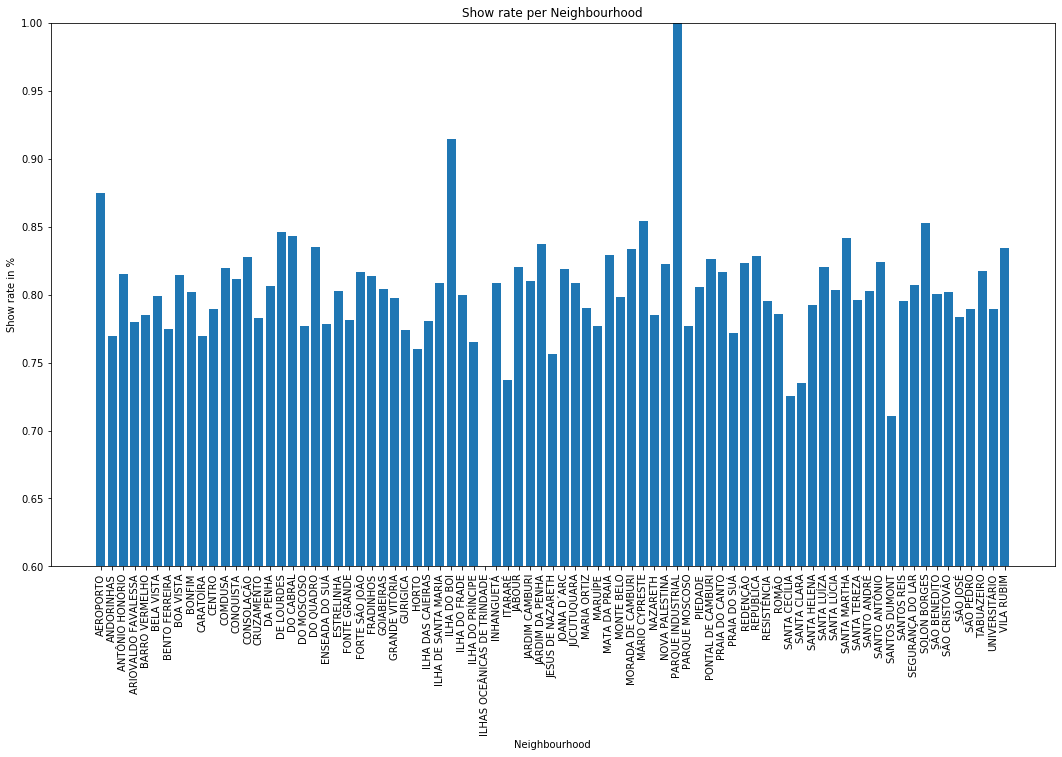

In [19]:
bar_comparison('Neighbourhood')

> **Conclusion**: <br>
> Show rate differs per neighborhood, the lowest is Santos Dumont at ~72% while the highest is Parque Industrial at 100%, (which is both caused by low base) <br>
> Average show rate is 79% <br>
> 51 neighborhoods have above average show rate, 30 have below average show rate. <br>
> 75% is at 82%, 50% is at 80%.

### Research Question 3  <br>
### Is age an good predictor of patients' show in appointment?

,No-show
mean,0.809130
25%,0.771534
50%,0.814120
75%,0.838632


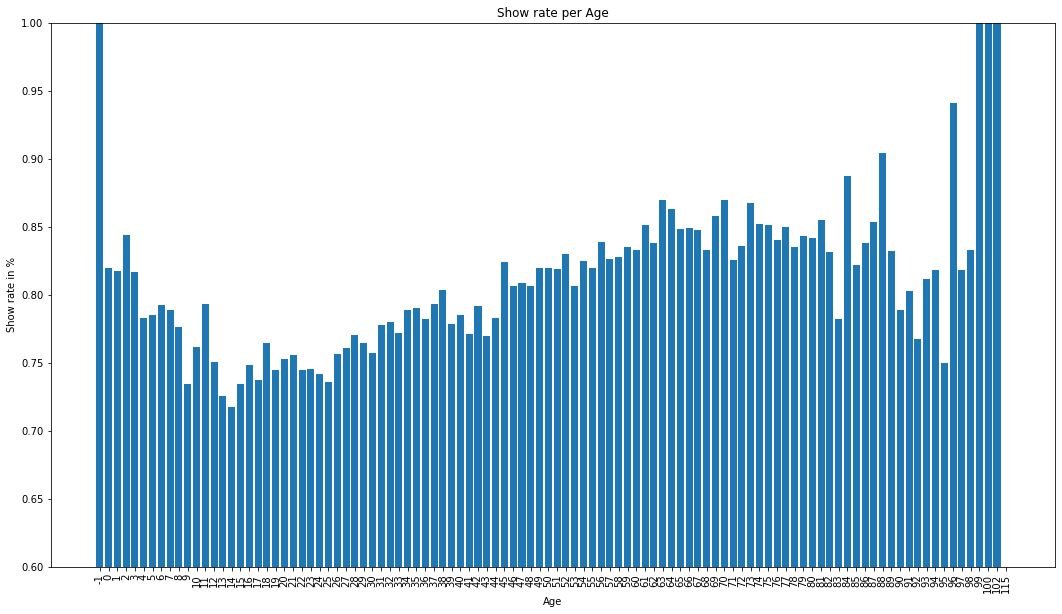

In [20]:
bar_comparison('Age')

> **Conclusion**: <br>
> The lowest is age 14 at ~72% while the highest is age -1 and age over 100 (all outliers) <br>
> Average show rate is 81% <br>
> 75% is at 84%, 50% is at 81%. <br>
> We do see an increasing trend from age 14 to age 88.

### Research Question 4 <br>
### For the other categorical variables, which could be a good predictor of high show rate?

> As these are all categorical variables, it's possible to compare show rate per value, for instance show rate for group with scholarship vs. without, group having diabetes vs. having no diabets etc. If the difference is big, this could be a good factor for predicting.

In [21]:
# all other categorical columns
cols = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handicaped_dummy','SMS_received','male']

In [27]:
# get number of show patients per column
len_show = df[cols].apply(pd.value_counts)
len_show

,Scholarship,Hipertension,Diabetes,Alcoholism,Handicaped_dummy,SMS_received,male
0,99666,88726,102584,107167,108286,75045,71840
1,10861,21801,7943,3360,2241,35482,38687


In [28]:
# get number of show patients that are yes in any column
show = df[df['No-show']==1][cols].apply(pd.value_counts)
show

,Scholarship,Hipertension,Diabetes,Alcoholism,Handicaped_dummy,SMS_received,male
0,79925,70179,81695,85525,86374,62510,57246
1,8283,18029,6513,2683,1834,25698,30962


In [29]:
# transpose to plot
df_1 = (show/len_show).transpose()

In [32]:
df_1

,0,1
Scholarship,0.801928,0.762637
Hipertension,0.790963,0.826980
Diabetes,0.796372,0.819967
Alcoholism,0.798054,0.798512
Handicaped_dummy,0.797647,0.818385
SMS_received,0.832967,0.724255
male,0.796854,0.800321


Text(0, 0.5, 'Show rate in %')

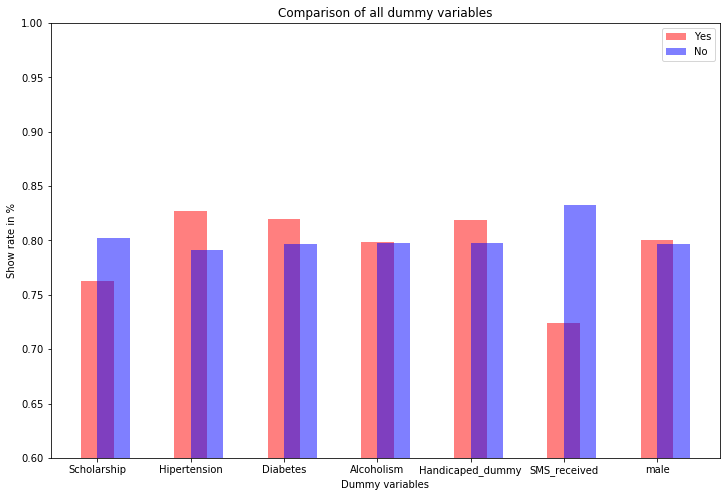

In [33]:
x = np.arange(len(df_1.index))

# visualization
width = 0.35
plt.subplots(figsize=(12,8))
plt.bar(x, df_1[1], width, alpha = 0.5, color = 'r', label ='Yes' )
plt.bar(x + width/2, df_1[0], width, alpha = 0.5, color = 'b', label ='No')
plt.legend()
plt.xticks(x, cols)
plt.ylim(0.6,1)
plt.title('Comparison of all dummy variables')
plt.xlabel('Dummy variables')
plt.ylabel('Show rate in %')

> **Conclusion**: <br>
> Show rate predicted by alcoholism yes no group is almost the same, as well as gender. Male has slightly higher show rate than female.
> Patients without scholarship is 3% higher than those with scholarship in show rate. <br>
> Patients in slightly worse physical conditions such as hipertension, diabetes, handicaped have higher show rate than the other (higher by 5%, 3%, 3% respectively). <br>
> For some reason, patients who received SMS have much lower show rate than those who didn't by(10%), which is werid.

<a id='conclusions'></a>
## Conclusions

> This coding aimed to identify factors which might impact appointment show rate for patients. <br>
> All in all, neighborhood was digged in. The findings imply that patients in different neighborhood do have different show rate, for instance Santos Dumont at ~72%, Parque Industrial at 100%. <br>
> Age has also been analyzed, an increasing show rate was noticed from age 14 to age 88. <br>
> With regards to the other categorical variables, scholarship, hipertension, diabetes, handicaped imply a big difference between patients indicating yes and the other, while gender and alcoholism are not strongly related to show rate. <br>

## Limitations
> As it has been noticed in age, there are outliers with unclear meaning, if these outliers are cleaned, findings might be impacted. <br>
> Given on different sample size in neighborhood, findings might be ambiguous.